# Imersão Python - Aula 4

O assunto dessa aula é sobre como fazer gráficos de candlestick (velas) interativos e não interativos.

Os gráficos de candlesitck mostram oa valores de abertura é fechamento de uma ação, indicando pelas cores se aquela ação teve uma baixa ou uma alta.

Estes são exemplos de gráficos de candlestick:

![Gráfico de velas](../imagens/Candlestick.png)

![Explicação sobre as velas do gráfico](../imagens/Candlestickchart.png)


Para começarmos temos que importar as bibliotecas, são elas:
- pandas
- matplotlib.pyplot
- matplotlib.dates
- mplfinance
- yfinance - é uma API que contém dados de ações de diversas bolsas
- plotly.graph_objects
- plotly.subplots


>Se isso estiver sendo feito no Google Colab e dar o erro de não ter alguma biblioteca pode-se instala-la usando `!pip install <Nome da biblioteca>`

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Inicialmente iremos baixar os dados das ações utilizando a função download da biblioteca yfinance

Essa função recebe como parametros o nome da ação, e como a ação utilizada é brasileira é necessário colocar um .SA após o nome. Os outros parametros são a data de inicio e fim dos dados que queremos.

In [81]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


Como os nomes das colunas estão em inglês precisamos renomea-las para um melhor entendimento.

Fazemos isso colocando `Nome_DataFrame.columns` que usando só ele teriamos o retorno do nome de todas as colunas.

Então atribuimos a ele os novos nomes das colunas, fazendo dessa forma é necessário colocar nomes para todas as colunas, até mesmo as que não precisam ser renomeadas, além disso os nomes inseridos devem estar na ordem que é mostrado no DataFrame

In [82]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_ajust', 'Volume']
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_ajust,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


## Criando os gráficos

Iniciamos criando um gráfico simples com os valores de fechamento do DataFrame

Para isso usamos a função plot do pandas que recebeu como parametros a altura e largura do gráfico na forma de uma tupla

Após isso antes do gráfico ser exibido adicionamos a função title da biblioteca matplotlib (plt) com o nome que queremos para o gráfico e o tamanho da fonte desse titulo.

E por último adicionamos uma legenda com a função legend que recebeu como parametro a coluna da qual está sendo feito o gráfico

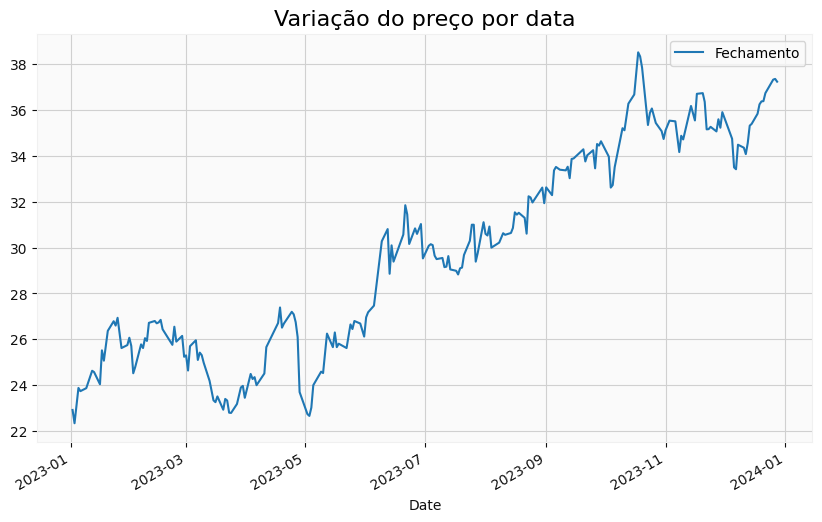

In [83]:
dados['Fechamento'].plot(figsize=(10, 6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

### Criando o gráfico de candlestick

Iniciamos criando um novo DataFrame com somente as primeiras 60 linhas do DataFrame principal

Após isso colocamos a coluna de data em uma nova coluna e a transformamos em números, pois por trás da exibição das datas existe um número que corresponde a cada uma delas.

Para transformarmos essa data em número utilizamos a função apply que chama outras funções que no caso é a date2num da biblioteca matplotlib (mdates)

In [84]:
df = dados.head(60).copy()

# Convertendo o índice em uma coluna de data
df['Data'] = df.index

# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)

df

,Abertura,Maximo,Minimo,Fechamento,Fech_ajust,Volume,Data
Date,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443508,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613495,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030731,58130000,19369.0


Agora para criarmos o gráfico, e isso deve ser feito passo a passo

Com a função subplots que recebeu como parametros a altura e largura do gráfico criamos a tela inicial, e após isso os dados serão feitos utilizando a variável ax.

Definidos a largura de cada candle do gráfico com a variável width

Após isso fazemos um for que irá rodar no tamanho do DataFrame (0-59), e primeiramente nela definimos a cor dos candlestickes pois candles de baixa devem ser vemelhos e os de alta verdes. O método iloc recebe a posição do valor que estamos fazendo a verificação, que com o for vai mudando.

Logo depois iremos começar a desenhar as linhas verticais do gráfico, pegando as datas e desenhando linhas que vão do ponto minimo até o ponto maximo que aquela ação teve naquele dia.

Após desenhar as linhas iniciais, iremos desenhar os candles utilizando a função **add_patch** que adiciona objetos e iremos colocar como parametro a função **Retancle** que cria um retangulo, e para essa segunda função colocamos como parametros de x a data menos a largura dividida por dois (dessa forma o retangulo fica no meio da linha) e de y o valor minimo entre os valores de abertura e fechamento utilizando a função min *(Ex: Fechamento = 100, abertura = 90, ele retorna o 90)*

Para Continuarmos a função retancle colocamos a largura do retangulo definimos até onde ele irá cerscer utilizando a função abs que faz com que todo resultado seja positivo e passamos nessa função os valores de fechamento e abertura para ele calcular a diferença, e por ultimo na função retancle definimos a cor.

Para darmos inicio a finalização do gráfico definimos as médias móveis.
> Média móvel: calcula a média de um determinado periodo

Para isso criamos um DataFrame para cada média móvel (7 e 14 dias) e atribuimos a elas a função rolling que vai rolar no DataFrame principal deacordo com o parametro window e depois calculamos a média desse resultado

Para adicionarmos essa médias móveis ao gráfico utilizamos a função plot passando a data e a média móvel e o parametro label que será a legenda que será adicionada depois com a função legend

Agora precisamos formatar as datas no gráfico, pois elas estão na forma de números. Para isso iniciamos dizendo que as datas estão no eixo x com a função xaxis_date e formatamos com a função xaxis.set_major_formatter que recebe como parametro a função DateFormatter que por sua vez recebe como parametro o formato de data que queremos. Feito isso definimos que as datas estaram escritas em um ângulo de 45 graus para não se sobreporem com plt.xticks(rotation=45).

Feito isso definimos um titulo para o gráfico, e um titulo também para o eixo x e y.

E para finalizarmos definimos que o gráfico terá linhas de grade com a função grid 


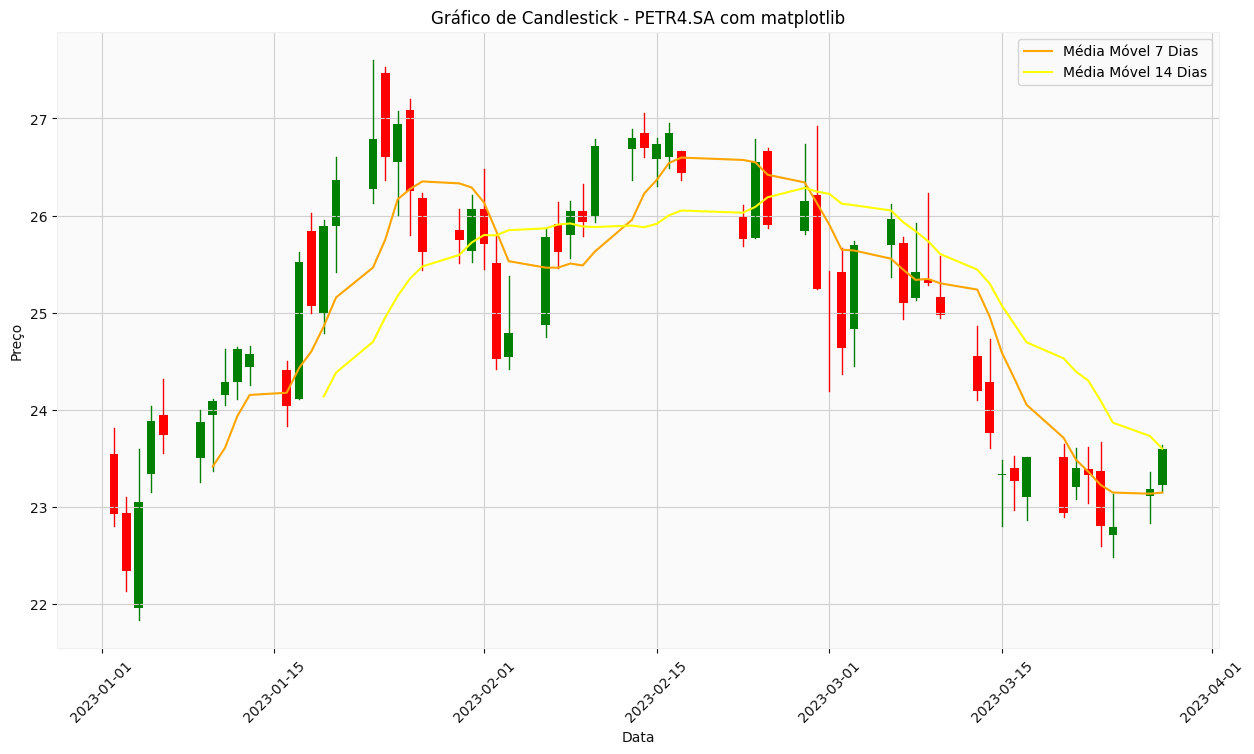

In [85]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

### Criando um gráfico de candlestick interativo

Para isso utilizamos a biblioteca plotly.

Iniciamos com a função make_subplots que irá nos permitir fazer dois gráficos juntos por isso definimos o parametro rows como 2.

Para desenharmos o gráfico de candlestick utilizamos a função add_trace que recebeu como parametro a função Candlestick, essa que por sua vez recebeu os nomes das colunas que possuem os valores.

Para definirmos as médias móveis utilizamos também o add_trace que recebeu como parametro a função Scatter, está que por sua vez recebe como parametro os nomes dos DataFrames que possuem as médias móveis

Terminamos adicionando um gráfico de barras que possui os valores de volume com as funções add_trace e bar.

Para finalizarmos definos o layout do gráfico.

In [86]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

### API

Iniciamos baixando novamente os dados da ação

In [87]:
dados = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


Com está API podemos fazer um gráfico de candlestick utilizando somente uma linha, para isso utilizamos a biblioteca mplfinance com a função plot que receberu como parametros a quantiadade de linhas que querimaos para o gráfico, o tipo de gráfico, o tamanho do gráfico, se irá ser feito o gráfico de volume, as médias móveis e por fim o estilo de cores

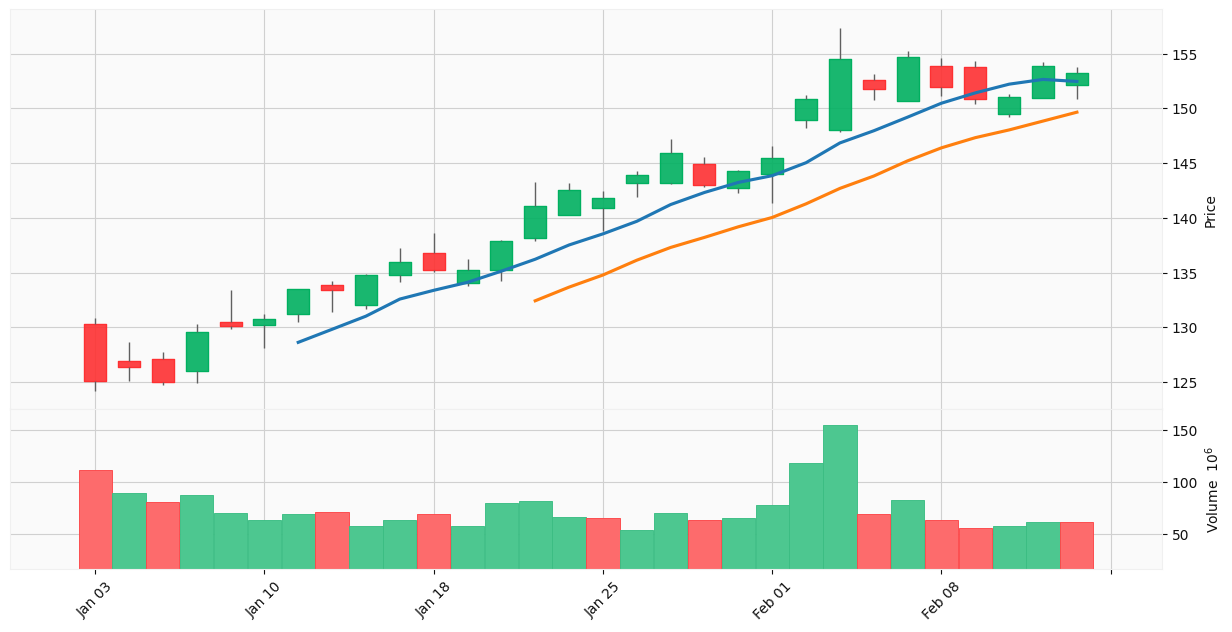

In [88]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')